In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/13 06:23:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df=spark.read.load('water_potability.csv',format='csv',header='True')
df.show()

+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+
|                ph|          Hardness|            Solids|       Chloramines|           Sulfate|      Conductivity|    Organic_carbon|   Trihalomethanes|         Turbidity|Potability|
+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+
|              null| 204.8904554713363|20791.318980747026| 7.300211873184757|368.51644134980336| 564.3086541722439|  10.3797830780847|  86.9909704615088|2.9631353806316407|         0|
|  3.71608007538699|129.42292051494425|18630.057857970347|    6.635245883862|              null| 592.8853591348523|15.180013116357259| 56.32907628451764| 4.500656274942408|         0|
| 8.099124189298397|224.23625939355776|19909.541732292393| 9.275883602694089|   

In [3]:
df.count()

3276

In [4]:
df.select(df.ph.isNull()).show()

+------------+
|(ph IS NULL)|
+------------+
|        true|
|       false|
|       false|
|       false|
|       false|
|       false|
|       false|
|       false|
|        true|
|       false|
|       false|
|       false|
|       false|
|        true|
|       false|
|       false|
|       false|
|       false|
|       false|
|       false|
+------------+
only showing top 20 rows



In [5]:
df.printSchema()

root
 |-- ph: string (nullable = true)
 |-- Hardness: string (nullable = true)
 |-- Solids: string (nullable = true)
 |-- Chloramines: string (nullable = true)
 |-- Sulfate: string (nullable = true)
 |-- Conductivity: string (nullable = true)
 |-- Organic_carbon: string (nullable = true)
 |-- Trihalomethanes: string (nullable = true)
 |-- Turbidity: string (nullable = true)
 |-- Potability: string (nullable = true)



In [6]:
from pyspark import SparkContext
df.groupBy('potability').mean().show()

+----------+
|potability|
+----------+
|         0|
|         1|
+----------+



In [7]:
df.createOrReplaceTempView('p')
results=spark.sql("SELECT * FROM p")
results=spark.sql("SELECT ph FROM p WHERE potability = 0")
results.count()

1998

In [8]:
df.createOrReplaceTempView('p')
results=spark.sql("SELECT * FROM p")
results=spark.sql("SELECT ph FROM p WHERE potability = 1")
results.count()

1278

Step3

In [9]:
from pyspark.sql.functions import mean
mean_ph = df.select(mean(df['ph'])).collect()
mean_sulfate = df.select(mean(df['Sulfate'])).collect()
mean_trihalomethanes = df.select(mean(df['trihalomethanes'])).collect()
print(mean_ph,mean_sulfate,mean_trihalomethanes)

[Row(avg(ph)=7.080794504276819)] [Row(avg(Sulfate)=333.7757766108134)] [Row(avg(trihalomethanes)=66.39629294676803)]


In [10]:
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType,FloatType)
data_schema = [StructField('ph',FloatType(),True),
               StructField('Hardness',FloatType(),True),
               StructField('Solids',FloatType(),True),
               StructField('Chloramines',FloatType(),True),
               StructField('Sulfate',FloatType(),True),
               StructField('Conductivity',FloatType(),True),
               StructField('Organic_carbon',FloatType(),True),
               StructField('Trihalomethanes',FloatType(),True),
               StructField('Turbidity',FloatType(),True),
              StructField('Potability',IntegerType(),True)]

final_struct = StructType(fields=data_schema)
df = spark.read.csv('water_potability.csv', schema=final_struct)

df.printSchema()
df.show()

root
 |-- ph: float (nullable = true)
 |-- Hardness: float (nullable = true)
 |-- Solids: float (nullable = true)
 |-- Chloramines: float (nullable = true)
 |-- Sulfate: float (nullable = true)
 |-- Conductivity: float (nullable = true)
 |-- Organic_carbon: float (nullable = true)
 |-- Trihalomethanes: float (nullable = true)
 |-- Turbidity: float (nullable = true)
 |-- Potability: integer (nullable = true)

+----------+---------+---------+-----------+---------+------------+--------------+---------------+---------+----------+
|        ph| Hardness|   Solids|Chloramines|  Sulfate|Conductivity|Organic_carbon|Trihalomethanes|Turbidity|Potability|
+----------+---------+---------+-----------+---------+------------+--------------+---------------+---------+----------+
|      null|     null|     null|       null|     null|        null|          null|           null|     null|      null|
|      null|204.89046|20791.318|   7.300212|368.51645|   564.30865|     10.379783|       86.99097|2.9631355|

In [11]:
df=df.na.drop(how="all")
df.show()

+----------+---------+---------+-----------+---------+------------+--------------+---------------+---------+----------+
|        ph| Hardness|   Solids|Chloramines|  Sulfate|Conductivity|Organic_carbon|Trihalomethanes|Turbidity|Potability|
+----------+---------+---------+-----------+---------+------------+--------------+---------------+---------+----------+
|      null|204.89046|20791.318|   7.300212|368.51645|   564.30865|     10.379783|       86.99097|2.9631355|         0|
| 3.7160802|129.42293|18630.059|   6.635246|     null|    592.8854|     15.180013|      56.329075| 4.500656|         0|
|  8.099124|224.23625|19909.541|   9.275884|     null|    418.6062|     16.868637|       66.42009|3.0559337|         0|
|  8.316766| 214.3734|22018.418|   8.059333|356.88614|    363.2665|     18.436525|     100.341675|4.6287704|         0|
|  9.092223|181.10152|17978.986|     6.5466|310.13574|   398.41083|     11.558279|      31.997993|4.0750756|         0|
| 5.5840864|188.31332|28748.688|   7.544

In [12]:
mean_ph_val=mean_ph[0][0]
mean_sulfate_val=mean_sulfate[0][0]
mean_trihalomethanes_val=mean_trihalomethanes[0][0]

In [13]:
mean_ph_val


7.080794504276819

In [14]:
df=df.na.fill(mean_ph_val, subset=['ph'])
df=df.na.fill(mean_sulfate_val, subset=['Sulfate'])
df=df.na.fill(mean_trihalomethanes_val, subset=['Trihalomethanes'])
df.show()

+----------+---------+---------+-----------+---------+------------+--------------+---------------+---------+----------+
|        ph| Hardness|   Solids|Chloramines|  Sulfate|Conductivity|Organic_carbon|Trihalomethanes|Turbidity|Potability|
+----------+---------+---------+-----------+---------+------------+--------------+---------------+---------+----------+
| 7.0807943|204.89046|20791.318|   7.300212|368.51645|   564.30865|     10.379783|       86.99097|2.9631355|         0|
| 3.7160802|129.42293|18630.059|   6.635246| 333.7758|    592.8854|     15.180013|      56.329075| 4.500656|         0|
|  8.099124|224.23625|19909.541|   9.275884| 333.7758|    418.6062|     16.868637|       66.42009|3.0559337|         0|
|  8.316766| 214.3734|22018.418|   8.059333|356.88614|    363.2665|     18.436525|     100.341675|4.6287704|         0|
|  9.092223|181.10152|17978.986|     6.5466|310.13574|   398.41083|     11.558279|      31.997993|4.0750756|         0|
| 5.5840864|188.31332|28748.688|   7.544

In [15]:
cols = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
bounds={}
for col in cols:
    quantiles = df.approxQuantile(col,[0.1,0.9],0.05)
    IQR = quantiles[1]-quantiles[0]
    bounds[col] = [
        quantiles[0]-1.5*IQR,
        quantiles[1]+1.5*IQR
    ]
bounds

{'ph': [0.6324212551116943, 13.259422063827515],
 'Hardness': [48.131752014160156, 337.6603775024414],
 'Solids': [-16671.27294921875, 59886.17626953125],
 'Chloramines': [0.04149985313415527, 13.95160460472107],
 'Sulfate': [179.2180633544922, 482.8463592529297],
 'Conductivity': [46.10401916503906, 797.2577056884766],
 'Organic_carbon': [-0.9089875221252441, 29.060468196868896],
 'Trihalomethanes': [-6.376916885375977, 135.9703884124756],
 'Turbidity': [0.28180789947509766, 7.512455940246582]}

In [16]:
import os
from pyspark import SparkContext,SparkConf
from pyspark.sql import SparkSession
import pyspark.sql.functions as fn
from pyspark.sql import functions as F, Window
df2 = df.withColumn(
    'ph',
    F.when(
        (df['ph']>13.259422063827515)|(df['ph']<0.6324212551116943),
        F.round(F.mean('ph').over(Window.orderBy(F.lit(1)))).cast('float')        
    ).otherwise(F.col('ph'))
)
df2 = df2.withColumn(
    'Hardness',
    F.when(
        (df['Hardness']>337.6603775024414)|(df['Hardness']<48.131752014160156),
        F.round(F.mean('Hardness').over(Window.orderBy(F.lit(1)))).cast('float')        
    ).otherwise(F.col('Hardness'))
)
df2 = df2.withColumn(
    'Solids',
    F.when(
        (df['Solids']>59886.17626953125)|(df['Solids']<-16671.27294921875),
        F.round(F.mean('Solids').over(Window.orderBy(F.lit(1)))).cast('float')        
    ).otherwise(F.col('Solids'))
)
df2 = df2.withColumn(
    'Chloramines',
    F.when(
        (df['Chloramines']>13.95160460472107)|(df['Chloramines']<0.04149985313415527),
        F.round(F.mean('Chloramines').over(Window.orderBy(F.lit(1)))).cast('float')        
    ).otherwise(F.col('Chloramines'))
)
df2 = df2.withColumn(
    'Sulfate',
    F.when(
        (df['Sulfate']>482.8463592529297)|(df['Sulfate']<179.2180633544922),
        F.round(F.mean('Sulfate').over(Window.orderBy(F.lit(1)))).cast('float')        
    ).otherwise(F.col('Sulfate'))
)
df2 = df2.withColumn(
    'Conductivity',
    F.when(
        (df['Conductivity']>797.2577056884766)|(df['Conductivity']<46.10401916503906),
        F.round(F.mean('Conductivity').over(Window.orderBy(F.lit(1)))).cast('float')        
    ).otherwise(F.col('Conductivity'))
)
df2 = df2.withColumn(
    'Organic_carbon',
    F.when(
        (df['Organic_carbon']>29.060468196868896)|(df['Organic_carbon']<-0.9089875221252441),
        F.round(F.mean('Organic_carbon').over(Window.orderBy(F.lit(1)))).cast('float')        
    ).otherwise(F.col('Organic_carbon'))
)
df2 = df2.withColumn(
    'Trihalomethanes',
    F.when(
        (df['Trihalomethanes']>135.9703884124756)|(df['Trihalomethanes']<-6.376916885375977),
        F.round(F.mean('Trihalomethanes').over(Window.orderBy(F.lit(1)))).cast('float')        
    ).otherwise(F.col('Trihalomethanes'))
)
df2 = df2.withColumn(
    'Turbidity',
    F.when(
        (df['Turbidity']>7.512455940246582)|(df['Turbidity']<0.28180789947509766),
        F.round(F.mean('Turbidity').over(Window.orderBy(F.lit(1)))).cast('float')        
    ).otherwise(F.col('Turbidity'))
)

In [17]:
pota0=df2.filter('Potability==0')
pota0.count()

1998

In [18]:
pota1=df2.filter('Potability==1')
pota1.count()

1278

In [19]:
df3=df2.filter(df2['Potability']==1)
df3=df3.sample(fraction=0.61,seed=3)
df3.count()

704

In [20]:
df4=df3.union(df2)
df4.show()

22/10/13 06:24:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:03 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+---------+---------+---------+-----------+---------+------------+--------------+---------------+---------+----------+
|       ph| Hardness|   Solids|Chloramines|  Sulfate|Conductivity|Organic_carbon|Trihalomethanes|Turbidity|Potability|
+---------+---------+---------+-----------+---------+------------+--------------+---------------+---------+----------+
| 9.445129| 145.8054|13168.529|   9.444471|310.58337|     592.659|      8.606397|       77.57746|3.8751652|         1|
| 7.174135|203.40894|20401.102|   7.681806| 287.0857|    315.5499|      14.53351|       74.40562|3.9398956|         1|
|7.6579914|236.96089|14245.789|   6.289065|373.16537|   416.62418|     10.464238|       85.85277|2.4372964|         1|
| 9.802721|98.771645|27357.457|    9.21815|323.19907|    512.4287|     14.168934|       59.45444| 2.764634|         1|
| 4.997771| 280.0824|26849.195|  6.1307564|374.23297|   297.61154|     15.571571|       70.56027|3.4046328|         1|
| 7.788055|212.69145| 29879.06|  6.9989614|360.6

In [21]:
df4.count()

3980

In [22]:
import pyspark.sql.functions as F
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType,FloatType)

mean_chloramines = df.select(mean(df['Chloramines'])).collect()
def somefunc(value):
    if value < mean_chloramines[0][0]:
        return '0'
    else:
        return '1'
udfsomefunc = F.udf(somefunc, StringType())
ratings_with_high_low = df4.withColumn("Chloramines_mean", udfsomefunc("Chloramines"))

mean_ph = df.select(mean(df['ph'])).collect()
def somefunc(value):
    if value < mean_ph[0][0]:
        return '0'
    else:
        return '1'
udfsomefunc = F.udf(somefunc, StringType())
ratings_with_high_low = ratings_with_high_low.withColumn("ph_mean", udfsomefunc("ph"))

mean_Hardness = df.select(mean(df['Hardness'])).collect()
def somefunc(value):
    if value < mean_Hardness[0][0]:
        return '0'
    else:
        return '1'
udfsomefunc = F.udf(somefunc, StringType())
ratings_with_high_low = ratings_with_high_low.withColumn("Hardness_mean", udfsomefunc("Hardness"))

mean_Solids = df.select(mean(df['Solids'])).collect()
def somefunc(value):
    if value < mean_Solids[0][0]:
        return '0'
    else:
        return '1'
udfsomefunc = F.udf(somefunc, StringType())
ratings_with_high_low = ratings_with_high_low.withColumn("Solids_mean", udfsomefunc("Solids"))

mean_Sulfate = df.select(mean(df['Sulfate'])).collect()
def somefunc(value):
    if value < mean_Sulfate[0][0]:
        return '0'
    else:
        return '1'
udfsomefunc = F.udf(somefunc, StringType())
ratings_with_high_low = ratings_with_high_low.withColumn("Sulfate_mean", udfsomefunc("Sulfate"))

mean_Conductivity = df.select(mean(df['Conductivity'])).collect()
def somefunc(value):
    if value < mean_Conductivity[0][0]:
        return '0'
    else:
        return '1'
udfsomefunc = F.udf(somefunc, StringType())
ratings_with_high_low = ratings_with_high_low.withColumn("Conductivity_mean", udfsomefunc("Conductivity"))

mean_Organic_carbon = df.select(mean(df['Organic_carbon'])).collect()
def somefunc(value):
    if value < mean_Organic_carbon[0][0]:
        return '0'
    else:
        return '1'
udfsomefunc = F.udf(somefunc, StringType())
ratings_with_high_low = ratings_with_high_low.withColumn("Organic_carbon_mean", udfsomefunc("Organic_carbon"))

mean_Trihalomethanes = df.select(mean(df['Trihalomethanes'])).collect()
def somefunc(value):
    if value < mean_Trihalomethanes[0][0]:
        return '0'
    else:
        return '1'
udfsomefunc = F.udf(somefunc, StringType())
ratings_with_high_low = ratings_with_high_low.withColumn("Trihalomethanes_mean", udfsomefunc("Trihalomethanes"))

mean_Turbidity = df.select(mean(df['Turbidity'])).collect()
def somefunc(value):
    if value < mean_Turbidity[0][0]:
        return '0'
    else:
        return '1'
udfsomefunc = F.udf(somefunc, StringType())
ratings_with_high_low = ratings_with_high_low.withColumn("Turbidity_mean", udfsomefunc("Turbidity"))

ratings_with_high_low.show()


22/10/13 06:24:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+---------+---------+---------+-----------+---------+------------+--------------+---------------+---------+----------+----------------+-------+-------------+-----------+------------+-----------------+-------------------+--------------------+--------------+
|       ph| Hardness|   Solids|Chloramines|  Sulfate|Conductivity|Organic_carbon|Trihalomethanes|Turbidity|Potability|Chloramines_mean|ph_mean|Hardness_mean|Solids_mean|Sulfate_mean|Conductivity_mean|Organic_carbon_mean|Trihalomethanes_mean|Turbidity_mean|
+---------+---------+---------+-----------+---------+------------+--------------+---------------+---------+----------+----------------+-------+-------------+-----------+------------+-----------------+-------------------+--------------------+--------------+
| 9.445129| 145.8054|13168.529|   9.444471|310.58337|     592.659|      8.606397|       77.57746|3.8751652|         1|               1|      1|            0|          0|           0|                1|                  0|         

In [23]:
a=ratings_with_high_low.corr("ph","Potability")
b=ratings_with_high_low.corr("Hardness","Potability")
c=ratings_with_high_low.corr("Solids","Potability")
d=ratings_with_high_low.corr("Chloramines","Potability")
e=ratings_with_high_low.corr("Sulfate","Potability")
f=ratings_with_high_low.corr("Conductivity","Potability")
g=ratings_with_high_low.corr("Organic_carbon","Potability")
h=ratings_with_high_low.corr("Trihalomethanes","Potability")
i=ratings_with_high_low.corr("Turbidity","Potability")
print(a,b,c,d,e,f,g,h,i)

22/10/13 06:24:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

-0.00032167402768924476 -0.01753421208253183 0.0466009045863051 0.022040490159890277 -0.015428052859715225 -0.012266897683570963 -0.03092069439539341 0.00614341532759532 0.00014646171259108251


22/10/13 06:24:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:09 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [24]:
discrete_data=ratings_with_high_low.select('Chloramines_mean','ph_mean','Hardness_mean','Solids_mean','Sulfate_mean','Conductivity_mean','Organic_carbon_mean','Trihalomethanes_mean','Turbidity_mean','Potability')

In [25]:
discrete_data.show()

22/10/13 06:24:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------------+-------+-------------+-----------+------------+-----------------+-------------------+--------------------+--------------+----------+
|Chloramines_mean|ph_mean|Hardness_mean|Solids_mean|Sulfate_mean|Conductivity_mean|Organic_carbon_mean|Trihalomethanes_mean|Turbidity_mean|Potability|
+----------------+-------+-------------+-----------+------------+-----------------+-------------------+--------------------+--------------+----------+
|               1|      1|            0|          0|           0|                1|                  0|                   1|             0|         1|
|               1|      1|            1|          0|           0|                0|                  1|                   1|             0|         1|
|               0|      1|            1|          0|           1|                0|                  0|                   1|             0|         1|
|               1|      1|            0|          1|           0|                1|           

In [26]:
continue_data=ratings_with_high_low.select('Chloramines','ph','Hardness','Solids','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity','Potability')

Step5

In [27]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('722_linear_regression_adv').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip install numpy --user' into the EC2 console.
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

In [28]:
continue_data.show()

22/10/13 06:24:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-----------+---------+---------+---------+---------+------------+--------------+---------------+---------+----------+
|Chloramines|       ph| Hardness|   Solids|  Sulfate|Conductivity|Organic_carbon|Trihalomethanes|Turbidity|Potability|
+-----------+---------+---------+---------+---------+------------+--------------+---------------+---------+----------+
|   9.444471| 9.445129| 145.8054|13168.529|310.58337|     592.659|      8.606397|       77.57746|3.8751652|         1|
|   7.681806| 7.174135|203.40894|20401.102| 287.0857|    315.5499|      14.53351|       74.40562|3.9398956|         1|
|   6.289065|7.6579914|236.96089|14245.789|373.16537|   416.62418|     10.464238|       85.85277|2.4372964|         1|
|    9.21815| 9.802721|98.771645|27357.457|323.19907|    512.4287|     14.168934|       59.45444| 2.764634|         1|
|  6.1307564| 4.997771| 280.0824|26849.195|374.23297|   297.61154|     15.571571|       70.56027|3.4046328|         1|
|  6.9989614| 7.788055|212.69145| 29879.06|360.6

In [29]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [30]:
assembler = VectorAssembler(
    inputCols=['Chloramines','Solids','Organic_carbon'],
    outputCol="features")


In [31]:
log_reg_titanic = LogisticRegression(featuresCol='features',labelCol='Potability')
pipeline = Pipeline(stages=[assembler,log_reg_titanic])

In [32]:
train_continue_data, test_continue_data = continue_data.randomSplit([0.7,.3])

In [33]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('decision_tree_adv').getOrCreate()

In [34]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

def string_to_float(x):
    return float(x)

udfstring_to_float = udf(string_to_float, FloatType())
discrete_data=discrete_data.withColumn("Chloramines_float", udfstring_to_float("Chloramines_mean"))
discrete_data=discrete_data.withColumn("ph_float", udfstring_to_float("ph_mean"))
discrete_data=discrete_data.withColumn("Hardness_float", udfstring_to_float("Hardness_mean"))
discrete_data=discrete_data.withColumn("Solids_float", udfstring_to_float("Solids_mean"))
discrete_data=discrete_data.withColumn("Sulfate_float", udfstring_to_float("Solids_mean"))
discrete_data=discrete_data.withColumn("Conductivity_float", udfstring_to_float("Conductivity_mean"))
discrete_data=discrete_data.withColumn("Organic_carbon_float", udfstring_to_float("Organic_carbon_mean"))
discrete_data=discrete_data.withColumn("Trihalomethanes_float", udfstring_to_float("Trihalomethanes_mean"))
discrete_data=discrete_data.withColumn("Turbidity_float", udfstring_to_float("Turbidity_mean"))
discrete_data

DataFrame[Chloramines_mean: string, ph_mean: string, Hardness_mean: string, Solids_mean: string, Sulfate_mean: string, Conductivity_mean: string, Organic_carbon_mean: string, Trihalomethanes_mean: string, Turbidity_mean: string, Potability: int, Chloramines_float: float, ph_float: float, Hardness_float: float, Solids_float: float, Sulfate_float: float, Conductivity_float: float, Organic_carbon_float: float, Trihalomethanes_float: float, Turbidity_float: float]

In [35]:
assembler = VectorAssembler(
  inputCols=['Chloramines_float','Solids_float','Organic_carbon_float'
  ],
              outputCol="features")

In [36]:
output = assembler.transform(discrete_data)

In [37]:
final_data = output.select("features",'Potability')

In [38]:
train_data2,test_data2 = final_data.randomSplit([0.7,0.3])

Step 6

6.1.1

In [39]:
assembler = VectorAssembler(
    inputCols=['Chloramines','Solids','Organic_carbon'],
    outputCol="features")
log_reg_titanic = LogisticRegression(featuresCol='features',labelCol='Potability')
pipeline = Pipeline(stages=[assembler,log_reg_titanic])
train_continue_data, test_continue_data = continue_data.randomSplit([0.7,.3],17)

In [40]:
fit_model = pipeline.fit(train_continue_data)
results = fit_model.transform(test_continue_data)

22/10/13 06:24:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:11 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:12 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

In [41]:

from pyspark.ml.evaluation import BinaryClassificationEvaluator
my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='Potability')

results.select('Potability','prediction').show()

22/10/13 06:24:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+----------+
|Potability|prediction|
+----------+----------+
|         1|       0.0|
|         1|       0.0|
|         1|       0.0|
|         1|       0.0|
|         1|       0.0|
|         1|       0.0|
|         1|       0.0|
|         1|       1.0|
|         1|       0.0|
|         1|       0.0|
|         1|       0.0|
|         1|       0.0|
|         1|       1.0|
|         1|       0.0|
|         1|       0.0|
|         1|       0.0|
|         1|       0.0|
|         1|       0.0|
|         1|       1.0|
|         1|       1.0|
+----------+----------+
only showing top 20 rows



In [42]:
# We can then evaluate using AUC (area under the curve). AUC is linked to ROC.
AUC = my_eval.evaluate(results)

AUC

22/10/13 06:24:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


0.5136984259480085

6.1.2

In [43]:
assembler = VectorAssembler(
  inputCols=['Chloramines_float','Solids_float','Organic_carbon_float'
  ],
              outputCol="features")
output = assembler.transform(discrete_data)
final_data = output.select("features",'Potability')
train_data2,test_data2 = final_data.randomSplit([0.7,0.3],17)

In [44]:
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [45]:
dtc = DecisionTreeClassifier(labelCol='Potability',featuresCol='features')
rfc = RandomForestClassifier(labelCol='Potability',featuresCol='features')
gbt = GBTClassifier(labelCol='Potability',featuresCol='features')


In [46]:
dtc_model = dtc.fit(train_data2)
rfc_model = rfc.fit(train_data2)
gbt_model = gbt.fit(train_data2)

22/10/13 06:24:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

In [47]:
dtc_predictions = dtc_model.transform(test_data2)
rfc_predictions = rfc_model.transform(test_data2)
gbt_predictions = gbt_model.transform(test_data2)

In [48]:
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Potability')

In [49]:
print("DTC:",my_binary_eval.evaluate(dtc_predictions))


print("RFC:",my_binary_eval.evaluate(rfc_predictions))


my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='Potability', rawPredictionCol='prediction')

print("GBT:",my_binary_gbt_eval.evaluate(gbt_predictions))

22/10/13 06:24:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


DTC: 0.5146484216230863


22/10/13 06:24:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


RFC: 0.5128058528654654


22/10/13 06:24:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


GBT: 0.5135618479880775


6.2

22/10/13 06:24:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

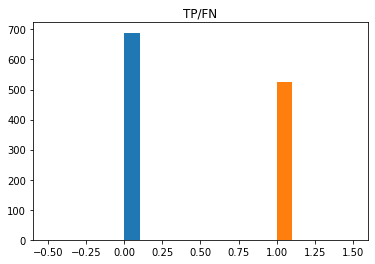

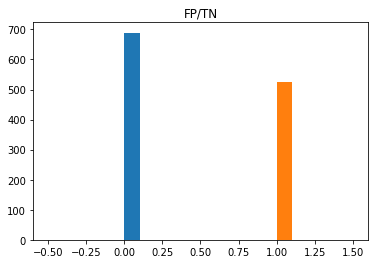

F1= 0.5314307751639028


In [50]:
# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

TPpota0 = np.array(results.filter('Potability == 0'and'prediction == 0').select('prediction').collect())
FNpota0 = np.array(results.filter('Potability == 0'and'prediction == 1').select('prediction').collect())
FPpota0 = np.array(results.filter('Potability == 1'and'prediction == 0').select('prediction').collect())
TNpota0 = np.array(results.filter('Potability == 1'and'prediction == 1').select('prediction').collect())

plt.title('TP/FN')
plt.hist(TPpota0)
plt.hist(FNpota0)
plt.show()

plt.title('FP/TN')
plt.hist(FPpota0)
plt.hist(TNpota0)
plt.show()

precision=len(TPpota0)/(len(TPpota0)+len(FPpota0))
recall=len(TPpota0)/(len(TPpota0)+len(FNpota0))
F1=(2*precision*recall)/(precision+recall)
print('F1=',F1)

In [51]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [52]:
# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="accuracy")
pre_evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="weightedPrecision")
recall_evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="weightedRecall")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="f1")
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
dtc_pre = pre_evaluator.evaluate(dtc_predictions)
dtc_recall = recall_evaluator.evaluate(dtc_predictions)
dtc_f1 = f1_evaluator.evaluate(dtc_predictions)
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A single decision tree has an precision of: {0:2.2f}%'.format(dtc_pre*100))
print('-'*40)
print('A single decision tree has an recall of: {0:2.2f}%'.format(dtc_recall*100))
print('-'*40)
print('A single decision tree has an f1 score of: {0:2.2f}%'.format(dtc_f1*100))

22/10/13 06:24:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 51.36%
----------------------------------------
A single decision tree has an precision of: 51.36%
----------------------------------------
A single decision tree has an recall of: 51.36%
----------------------------------------
A single decision tree has an f1 score of: 51.36%


In [53]:
acc_evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="accuracy")
pre_evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="weightedPrecision")
recall_evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="weightedRecall")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="f1")
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
rfc_pre = pre_evaluator.evaluate(rfc_predictions)
rfc_recall = recall_evaluator.evaluate(rfc_predictions)
rfc_f1 = f1_evaluator.evaluate(rfc_predictions)
print("Here are the results!")
print('-'*40)
print('A RandomForest has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('A RandomForest has an precision of: {0:2.2f}%'.format(rfc_pre*100))
print('-'*40)
print('A RandomForest has an recall of: {0:2.2f}%'.format(rfc_recall*100))
print('-'*40)
print('A RandomForest has an f1 score of: {0:2.2f}%'.format(rfc_f1*100))

22/10/13 06:24:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

Here are the results!
----------------------------------------
A RandomForest has an accuracy of: 51.36%
----------------------------------------
A RandomForest has an precision of: 51.36%
----------------------------------------
A RandomForest has an recall of: 51.36%
----------------------------------------
A RandomForest has an f1 score of: 51.36%


In [54]:
acc_evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="accuracy")
pre_evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="weightedPrecision")
recall_evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="weightedRecall")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="f1")
gbt_acc = acc_evaluator.evaluate(gbt_predictions)
gbt_pre = pre_evaluator.evaluate(gbt_predictions)
gbt_recall = recall_evaluator.evaluate(gbt_predictions)
gbt_f1 = f1_evaluator.evaluate(gbt_predictions)
print("Here are the results!")
print('-'*40)
print('A Gradient Boosting Decision Tree has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))
print('-'*40)
print('A Gradient Boosting Decision Tree has an precision of: {0:2.2f}%'.format(gbt_pre*100))
print('-'*40)
print('A Gradient Boosting Decision Tree has an recall of: {0:2.2f}%'.format(gbt_recall*100))
print('-'*40)
print('A Gradient Boosting Decision Tree has an f1 score of: {0:2.2f}%'.format(gbt_f1*100))

22/10/13 06:24:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:44 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

Here are the results!
----------------------------------------
A Gradient Boosting Decision Tree has an accuracy of: 51.36%
----------------------------------------
A Gradient Boosting Decision Tree has an precision of: 51.36%
----------------------------------------
A Gradient Boosting Decision Tree has an recall of: 51.36%
----------------------------------------
A Gradient Boosting Decision Tree has an f1 score of: 51.36%


In [55]:
assembler = VectorAssembler(
    inputCols=['Chloramines','Solids','Organic_carbon'],
    outputCol="features")
log_reg_titanic = LogisticRegression(featuresCol='features',labelCol='Potability',elasticNetParam=1)
pipeline = Pipeline(stages=[assembler,log_reg_titanic])
train_continue_data, test_continue_data = continue_data.randomSplit([0.7,.3],17)
fit_model = pipeline.fit(train_continue_data)
results = fit_model.transform(test_continue_data)
my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='Potability')
AUC = my_eval.evaluate(results)

AUC

22/10/13 06:24:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

0.5136984259480085

22/10/13 06:24:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:24:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

[0.5153448388005983, 0.5136984259480085, 0.5136984259480085, 0.5136984259480085, 0.5136984259480085, 0.5136984259480085, 0.5136984259480085, 0.5136984259480085, 0.5136984259480085, 0.5136984259480085]


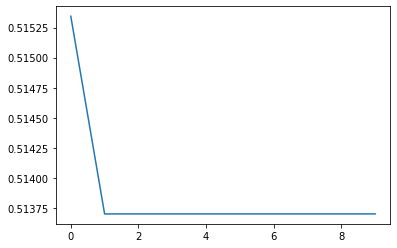

In [56]:
score=[]
for i in range(1,11,1):
    log_reg_titanic = LogisticRegression(featuresCol='features',labelCol='Potability',maxIter=i,elasticNetParam=1)
    pipeline = Pipeline(stages=[assembler,log_reg_titanic])
    train_continue_data, test_continue_data = continue_data.randomSplit([0.7,.3],17)
    fit_model = pipeline.fit(train_continue_data)
    results = fit_model.transform(test_continue_data)
    my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                           labelCol='Potability')
    score.append(my_eval.evaluate(results))
print(score)
plt.plot(score)
plt.show()

22/10/13 06:25:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

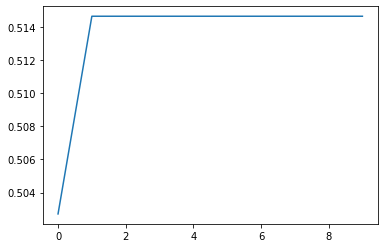

In [57]:
score=[]
for i in range(1,11,1):
    assembler = VectorAssembler(
      inputCols=['Chloramines_float','Solids_float','Organic_carbon_float'
      ],
                  outputCol="features")
    output = assembler.transform(discrete_data)
    final_data = output.select("features",'Potability')
    train_data2,test_data2 = final_data.randomSplit([0.7,0.3],17)
    dtc = DecisionTreeClassifier(labelCol='Potability',featuresCol='features',maxDepth=i)
    dtc_model = dtc.fit(train_data2)
    dtc_predictions = dtc_model.transform(test_data2)
    my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Potability')
    score.append(my_binary_eval.evaluate(dtc_predictions))
score
plt.plot(score)
plt.show()

Step 7

22/10/13 06:25:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

[0.5126316186062139, 0.5154555019480326, 0.5179424664668549, 0.5078722658097771, 0.5061926208210635, 0.5033198774526574, 0.5153448388005983, 0.5099954089329047, 0.4783253205128205]


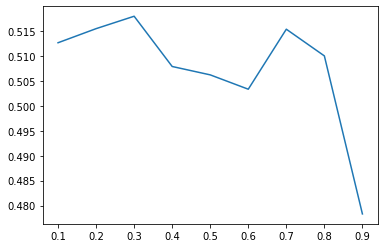

In [58]:
assembler = VectorAssembler(
    inputCols=['Chloramines','Solids','Organic_carbon'],
    outputCol="features")

score=[]
for i in np.arange(0.1,1,0.1):
    log_reg_titanic = LogisticRegression(featuresCol='features',labelCol='Potability',maxIter=1,elasticNetParam=1)
    pipeline = Pipeline(stages=[assembler,log_reg_titanic])
    train_continue_data, test_continue_data = continue_data.randomSplit([i,(1-i)],17)
    fit_model = pipeline.fit(train_continue_data)
    results = fit_model.transform(test_continue_data)
    my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                           labelCol='Potability')
    score.append(my_eval.evaluate(results))
print(score)
plt.plot(np.arange(0.1,1,0.1),score)
plt.show()

22/10/13 06:25:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:25:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

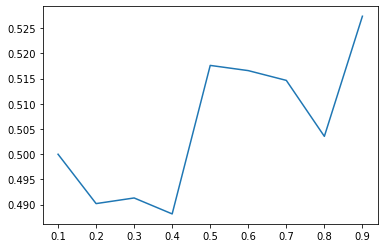

In [59]:
score=[]
for i in np.arange(0.1,1,0.1):
    assembler = VectorAssembler(
      inputCols=['Chloramines_float','Solids_float','Organic_carbon_float'
      ],
                  outputCol="features")
    output = assembler.transform(discrete_data)
    final_data = output.select("features",'Potability')
    train_data2,test_data2 = final_data.randomSplit([i,(1-i)],17)
    dtc = DecisionTreeClassifier(labelCol='Potability',featuresCol='features',maxDepth=2)
    dtc_model = dtc.fit(train_data2)
    dtc_predictions = dtc_model.transform(test_data2)
    my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Potability')
    score.append(my_binary_eval.evaluate(dtc_predictions))
score
plt.plot(np.arange(0.1,1,0.1),score)
plt.show()

22/10/13 06:26:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

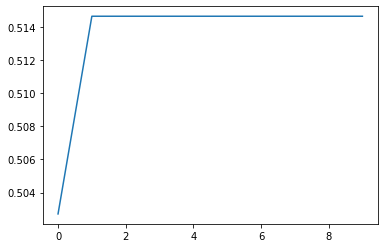

In [60]:
score=[]
for i in range(1,11,1):
    assembler = VectorAssembler(
      inputCols=['Chloramines_float','Solids_float','Organic_carbon_float'
      ],
                  outputCol="features")
    output = assembler.transform(discrete_data)
    final_data = output.select("features",'Potability')
    train_data2,test_data2 = final_data.randomSplit([0.7,0.3],17)
    dtc = DecisionTreeClassifier(labelCol='Potability',featuresCol='features',maxDepth=i)
    dtc_model = dtc.fit(train_data2)
    dtc_predictions = dtc_model.transform(test_data2)
    my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Potability')
    score.append(my_binary_eval.evaluate(dtc_predictions))
score
plt.plot(score)
plt.show()

In [61]:
final_data

DataFrame[features: vector, Potability: int]

Step 8

In [62]:
assembler = VectorAssembler(
      inputCols=['Chloramines_float','Solids_float','Organic_carbon_float'
      ],
                  outputCol="features")
output = assembler.transform(discrete_data)
final_data2 = output.select('Chloramines_float','Solids_float','Organic_carbon_float','Potability')
final_data2.createOrReplaceTempView('p')
potability1=spark.sql("SELECT Chloramines_float,Solids_float,Organic_carbon_float,Potability FROM p WHERE potability = 1")

potability1.show()


22/10/13 06:26:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-----------------+------------+--------------------+----------+
|Chloramines_float|Solids_float|Organic_carbon_float|Potability|
+-----------------+------------+--------------------+----------+
|              1.0|         0.0|                 0.0|         1|
|              1.0|         0.0|                 1.0|         1|
|              0.0|         0.0|                 0.0|         1|
|              1.0|         1.0|                 0.0|         1|
|              0.0|         1.0|                 1.0|         1|
|              0.0|         1.0|                 1.0|         1|
|              1.0|         0.0|                 1.0|         1|
|              0.0|         0.0|                 0.0|         1|
|              1.0|         1.0|                 1.0|         1|
|              1.0|         1.0|                 1.0|         1|
|              1.0|         1.0|                 0.0|         1|
|              0.0|         1.0|                 0.0|         1|
|              1.0|      

In [63]:
from pyspark.ml.functions import vector_to_array
test_data2.createOrReplaceTempView('p')
potability1=spark.sql("SELECT features,potability FROM p WHERE potability = 1")
df2 = potability1.select(vector_to_array("features").alias("features"))
df2.createOrReplaceTempView('q')
chlo0=spark.sql("SELECT features FROM q WHERE features[0] = 0")
chlo1=spark.sql("SELECT features FROM q WHERE features[0] = 1")
solids0=spark.sql("SELECT features FROM q WHERE features[1] = 0")
solids1=spark.sql("SELECT features FROM q WHERE features[1] = 1")
organic0=spark.sql("SELECT features FROM q WHERE features[2] = 0")
organic1=spark.sql("SELECT features FROM q WHERE features[2] = 1")

In [64]:
print('chloramines=0:',chlo0.count(),'chloramines=1:',chlo1.count(),'\nSolids=0:',solids0.count(),'Solids=1:',solids1.count(),'\nOrganic_carbon=0:',organic0.count(),'Organic_carbon=1:',organic1.count())

22/10/13 06:26:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

chloramines=0: 300 chloramines=1: 310 
Solids=0: 332 Solids=1: 278 
Organic_carbon=0: 317 Organic_carbon=1: 293


In [65]:
assembler = VectorAssembler(
    inputCols=['Chloramines','Solids','Organic_carbon'],
    outputCol="features")

log_reg_titanic = LogisticRegression(featuresCol='features',labelCol='Potability')
pipeline = Pipeline(stages=[assembler,log_reg_titanic])
train_continue_data, test_continue_data = continue_data.randomSplit([0.3,0.7],17)
fit_model = pipeline.fit(train_continue_data)
results = fit_model.transform(test_continue_data)
my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                           labelCol='Potability')
my_eval.evaluate(results)


22/10/13 06:26:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 0

0.5154341821078269

In [66]:
results.createOrReplaceTempView('p')
potability1=spark.sql("SELECT Potability FROM p WHERE prediction = 1")
potability1.count()

22/10/13 06:26:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


1002

In [67]:
continue_data2=continue_data.withColumn('Solids',continue_data['Solids']-10000)
continue_data2=continue_data2.withColumn('Organic_carbon',continue_data['Organic_carbon']-8)
continue_data2.show()

+-----------+---------+---------+---------+---------+------------+--------------+---------------+---------+----------+
|Chloramines|       ph| Hardness|   Solids|  Sulfate|Conductivity|Organic_carbon|Trihalomethanes|Turbidity|Potability|
+-----------+---------+---------+---------+---------+------------+--------------+---------------+---------+----------+
|   9.444471| 9.445129| 145.8054|3168.5293|310.58337|     592.659|     0.6063967|       77.57746|3.8751652|         1|
|   7.681806| 7.174135|203.40894|10401.102| 287.0857|    315.5499|       6.53351|       74.40562|3.9398956|         1|
|   6.289065|7.6579914|236.96089| 4245.789|373.16537|   416.62418|     2.4642382|       85.85277|2.4372964|         1|
|    9.21815| 9.802721|98.771645|17357.457|323.19907|    512.4287|      6.168934|       59.45444| 2.764634|         1|
|  6.1307564| 4.997771| 280.0824|16849.195|374.23297|   297.61154|     7.5715714|       70.56027|3.4046328|         1|
|  6.9989614| 7.788055|212.69145| 19879.06|360.6

22/10/13 06:26:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [68]:
train_continue_data2, test_continue_data2 = continue_data2.randomSplit([0.3,0.7],17)

results2 = fit_model.transform(test_continue_data2)
my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                           labelCol='Potability')
my_eval.evaluate(results)

22/10/13 06:26:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


0.5154341821078269

In [69]:
results2.createOrReplaceTempView('p')
potability1=spark.sql("SELECT Potability FROM p WHERE prediction = 1")
potability1.count()

22/10/13 06:26:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/10/13 06:26:43 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


2426